# Connect Four: AI Algorithm Analysis

*By Joesph Larson, Spencer Lofing, and Joel Kraft*

## Introduction

This project is based on our groups collective interest in the comparison of different AI algorithms in a game context. We were currous to see with given a game, what AI algorithm would preform better. The two alogorithms used in this project are Negamax AB Prunning and Q Scaling. Connect Four was the game we used as a basis for comparing the preformance of each algorithm against a variety of opponents. Oppenents include random players, opposing AI algorithms, and human players. 

Connect Four is a two person game that involves a 6x7 grid. The two opponents have colored chips (Red - 'R' and Blue - 'B'). The opponents alternate placeing a chip in one of the columns with the goal of getting four of their color in a row. In the physical representation of the game the board is vertical. This means when a chip is placed it goes to the lowest row.

Group Member Roles:

*Joseph Larson* - Q Learning Algorithm development/implementation

*Spencer Lofing* - Negamax AB Prunning development/implementation

*Joel Kraft* - General Game and random player implementation

## Methods

The code for this project can be broken down into three sections: General Game, Negamax AB Prunning, and Q Learning. In general the "players" were designed with their designated alrogithm so that they could be used through the `makeMove` function. This modular design allowed multiple opponents to be designed around one game structure for versitile testing and implementation. The three sections are discussed more indepth below.

### General Game Play

The general game play was designed to take in two opponents. These opponents are then used to make alternating moves until one of them wins. The results of the method contains the winning opponnent and the number of moves.

The play game funtion was inplemented in the function: `[winner,NumebrOfMoves] = playgame(algorithm1MakeMove, algorithm2MakeMove, verbose=False)`:

   - `algorithm1MakeMove`: The make move algorithm for the first opponnent
   - `algorithm1MakeMove`: The make move algorithm for the first opponent
   - `verbose`: This flag is True for printing all of the board steps. False keeps the output hidden
   - `[winner, NumberOfMoves]`: winner is a 1 for opponent 1 or 2 for opponent 2. A 0 is returned in the event of a tie. Number of Moves gives the number of moves until the solution was reached

The make move algorithms for these are expected to take in a state and a color. They then return the new state of the board.

An example of the general game play is shown below using two random players.

In [1]:
from TPmysolution import *

In [2]:
playgame(randomPlayerMakeMove,randomPlayerMakeMove)

(2, 34)

In [3]:
playgame(randomPlayerMakeMove,randomPlayerMakeMove,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B R X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B R X X X R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X B X X X X X 
B R X X X R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 
X B X X X X X 
B R X X X R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 
X B X X X X X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 
X B X X R X X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X B X X 
X B X X R X X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X B X X 
X B X X R R X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X B X X 
X R X X B X X 
X B X X R R X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X B X X 
X R X X B X X 
X B X X R R X 
B R R X B R X 


(1, 21)

A user can also serve as a playing function through the user make move function. The user is given the options of columns (0 indexed) and shown their color. After the user inputs their desired move the opponet is given a chance to play. An example of user verses the random player is given below.

In [4]:
playgame(userInputMakeMove,randomPlayerMakeMove)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X B 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X R B X B 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X R X X X 
X B X R B X B 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3


(1, 7)

The random player is shown against the user. The user was the Red - 'R' player and won fairly quickly and easily.

### Negamax AB Prunning

Negamax AB Prunning was one of the AI algorithms implemented in our connect four game. The AB prunning oponnent can be called by its `makeMoveABPruning()` function. This function utilizes the AB Prunning code from CS440 and adapted it to run and operate in the connect four game.

Maybe add an AB explanation here????

The AB prunning model worked very well. It is a little slow in its initial responses as it searches through the rather large list of possible solutions. This processing time decreases significantly as the game goes on. This opponent is very hard to beat. An example game play of this AI method against a user is shown below.

In [7]:
playgame(userInputMakeMove,makeMoveABPruning)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 5
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X R X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 6
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X X R R 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 4
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X B R R R 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 6
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X X X R 
B X X B R R R 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 0
X X X X X X X 
B X X X X X X 
R X X

(1, 17)

The AB player searches all of the possible solutions while prunning away paths that are not pheasible or paths that would definetly lead to a loss. Due to its ability to see all of the possible solutions it can be hard to beat. It is not impossible as shown in the game above. Overall the AB method seems to present a well balanced and intelegent opponent to play against. So far the only down side to this AI algorithm is the time that it takes to complete a game. 

In [6]:
playgame(randomPlayerMakeMove,makeMoveABPruning)

(2, 12)

When AB prunning plays itself it always has the exact same output with the same winner, number of moves, and resulting board. This might be an indication that it is impossible to play a perfect Tie in connect four without one player winning. It might also show that the second player can always win. These are rough theories that will be looked at more indepth with the other algorithms.

In [8]:
playgame(makeMoveABPruning,makeMoveABPruning)

(2, 38)

In [9]:
playgame(makeMoveABPruning,makeMoveABPruning)

(2, 38)

In [10]:
playgame(makeMoveABPruning,makeMoveABPruning)

(2, 38)

In [11]:
playgame(makeMoveABPruning,makeMoveABPruning,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 


(2, 38)

In [12]:
playgame(makeMoveABPruning,makeMoveABPruning,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 


(2, 38)

### Q Learning

Q Learning was the second AI algorithm implemented in our connect four game. The Q Learning algorithm must be trained initially and then called through its `makeQFunctionMove()` function. This function requires the training data be present in a global variable `Q`. The training of the Q function is rather time consuming but once it is completed the decisions for the algorithm are very quick. 

In [3]:
Q, stepsToGoal = trainQ(25000, 0.4, 0.9, validMoves, makeMove)

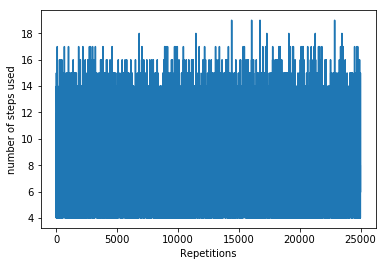

In [5]:
import matplotlib.pyplot as plt
plt.plot(stepsToGoal)
plt.ylabel('number of steps used') 
plt.xlabel('Repetitions')
plt.show()

The results of the Q learning show that the number of steps never fully decreases below 14. This means the best the function seems to be able to do it a victory in 14 steps. Ideally the lower this number, the better the algorithm. This number is not a bad number. To put it into perspective, the AB algorithm was able to beat the random player in roughly 17 moves in the example above. This would fall within the range shown for the Q Learning. As the training imporves and the algorithm gets better through larger sets or different training percentages, the value would hopfully decrease. As the average number of steps decreases, the algorithm shows it is learning the game better and able to win in less moves.

## Results

To compare the algorithms we first wanted to establish the validity of the random player and use that as a guidline for the comparisons. To show the random player is truely random 1000 trials of two random players is given below. The results are very close to a 50/50 split. This means the random players do seem to be random and there is an equal chance that each could win. Branching off from this base case we can start to analize the other algorithms. There were also a small number of 'Ties' showing that it is possible in the game of connect four to tie. This is extremely rare however and only took place in 0.2% of the trials.

In [2]:
[Rand1Win, Rand2Win, Ties, AverageMoves]=mutlipleTrials(randomPlayerMakeMove,randomPlayerMakeMove,1000)

In [3]:
print("Rand1 won: " + str(Rand1Win))
print("Rand2 Won: " + str(Rand2Win))
print("Ties: " + str(Ties))
print("Average Moves: " + str(AverageMoves))

Rand1 won: 558
Rand2 Won: 440
Ties: 2
Average Moves: 21.362


The AB Prunning algorithm is tested next. First it is run against the random opponent to see how it preforms against our base case. 

In [ ]:
[ABWin, RandWin, Ties, AverageMoves]=mutlipleTrials(makeMoveABPruning,randomPlayerMakeMove,50)

In [ ]:
print("AB won: " + str(ABWin))
print("Rand Won: " + str(RandWin))
print("Ties: " + str(Ties))
print("Average Moves: " + str(AverageMoves))

Results discussed  here:

The Q Learning algorithm can also be tested against our base opponent. The results of 50 trials are shown below. (For our implementations the Q function must be the second player.)

In [ ]:
[RandWin, QWin, Ties, AverageMoves]=mutlipleTrials(randomPlayerMakeMove,makeQFunctionMove,50)

In [ ]:
print("Rand won: " + str(RandWin))
print("Q Won: " + str(QWin))
print("Ties: " + str(Ties))
print("Average Moves: " + str(AverageMoves))

The final test between our algorithms is a battle between them. The AB prunning is played against the Q Learning to see which opponent wins and how often. We will also look at the number of moves and see if that varies from our other selections. Ideally the number of moves would be rather high since each player would be smart enough to not fall for simple early losses. 50 data points are used due to the long amount of time it takes to run a simulation with the AB prunning method.

In [ ]:
[ABWin, QWin, Ties]=mutlipleTrials(makeMoveABPruning,makeQFunctionMove,50)

## Conclusion